In [39]:
import pandas as pd
import numpy as np
from bokeh.charts import BoxPlot, show, defaults, Histogram, Bar
from bokeh.layouts import row, column
import seaborn  as sns
from bokeh.charts import BoxPlot, show, defaults, Histogram, Bar
from bokeh.layouts import row, column
import matplotlib as plt
from IPython.display import Image

### Here we have two kind of datasets:¶
### 1- data_long has all the test results we needed for the fu_years categories like:

    # blood measures
    # cognitions
    # Progressive metrics used for cognitions
    # demographics
    # Disabilites
    # lifestyle
    # Medical conditions-(cumulative of them)
    # Medications currently going on

### 2- data_basic has all informations for:

    # brain protiens 
    # age_death
    # race,sex,educ, 
    # baselines for all medical conditions 
    # pathology test results 

In [4]:
data_long = pd.read_excel("/Users/dilruba_p/Desktop/data/dataset_576_long.xlsx")

In [5]:
df = data_long.copy()
df.shape

(25570, 203)

In [6]:
print(df.isnull().sum())

projid                        0
study                         0
fu_year                       0
scaled_to                     0
anemia_who                12878
bun                       12889
ca                        12921
chlstrl                   12878
cl                        12891
co2                       12896
crn                       12889
fasting                   12878
gfr_mdrs                  12992
glucose                   12888
hba1c                     17164
hdlchlstrl                12880
hdlratio                  12881
hemacrit                  12984
hemoglbn                  12983
k                         12919
ldlchlstrl                12983
mch                       12986
mchc                      12986
mcv                       12984
na                        12889
platelet                  14377
rbc                       12986
rdw                       12984
tga                       12879
tsh                       12915
                          ...  
osteopor

In [7]:
total_cells= np.product(df.shape)
missing_data = df.isnull().sum()
missing = missing_data.sum()
percentage = (missing/total_cells)*100

In [8]:
print("the total missing percentage data in data_long is: ",percentage)

the total missing percentage data in data_long is:  15.2792970518


In [9]:

del df["anemia_who" ]

del df["bun"]
del df["cl"]
del df["co2"]
del df["fasting"]
del df["k"]
del df["na"]

In [10]:
del df["anticoagulant_rx"]
del df["osteoporosis_rx"]
del df["antiasthmatic_rx"]
del df["antihistamine_rx"]
del df["coughcoldallergy_rx"]
del df["nasal_rx"]
del df["alternative_rx"]
del df["cartilage_base_rx"]
del df["fish_oil_supplement_rx"]
del df["glucosamine_rx"]
del df["herbals_rx"]
del df["diabetes_rx"]
del df["antacid_rx"]
del df["antidiarrheal_rx"]
del df["antinausea_rx"]
del df["antireflux_rx"]
del df["laxative_rx"]
del df["musculoskeletal_rx"]
del df["ophthalmic_rx"]
del df["otic_rx"]
del df["respiratory_rx"]
del df["supplement_rx"]
del df["urinary_rx"]
del df["acetaminophen_rx"]
del df["antiinfective_rx"]
del df["vaccine_rx"]
del df["antiarrhythmic_rx"]
del df["rdw"]
del df["tga"]
del df["tsh"]
del df["wbc"]

del df["confid_health"]
del df["confid_instit"]
del df["finfintot"]
del df["finhlthtot"]
del df["finuctot"]
del df["fraud7"]
del df["scam"]
del df["gamma"]
del df["risk"]
del df["large_alpha"]
del df["small_alpha"]
del df["fin_literacy_pct"]
del df["health_literacy_pct"]
del df["literacy_total_pct"]

del df["thyroid_cum"]
del df["chf_cum"]
del df["heart_cum"]

del df["antibiotic_rx"]
del df["antihyp_all_rx"]
del df["antineoplastic_rx"]
del df["cardiac_rx"]
del df["dental_rx"]
del df["dermatologic_rx"]
del df["endocrine_rx"]
del df["gastrointestinal_rx"]
del df["hemotologic_rx"]
del df["lipid_lowering_rx"]

In [11]:
del df["macronutrient_rx"]
del df["micronutrient_rx"]
del df["mineral_rx"]
del df["multivitamin_rx"]
del df["nutrient_rx"]
del df["other_dietary_rx"]
del df["vitamin_minerals_rx"]
del df["vitamin_rx"]
del df["alphablocker_rx"]
del df["benign_pros_hyper_rx"]
del df["bphmed_rx"]
del df["estrogen_vaginal_rx"]
del df["urinary_antispas_rx"]
del df["urinary_inc_rx"]

In [12]:
#checking how many unique encodinga are there before removing people:
df.headinjrloc_cum.nunique()

2

In [13]:
#medications with analgesic_rx
df = df[df.analgesic_rx !=1]
#removing people who have a suspected of having head injuries in past visits 
df = df[df.headinjrloc_cum !=1]
#removing people who have a suspected of having cancer in past visits 
df = df[df.cancer_cum !=1]
#removing people who have a suspected of having diabetes in past visits 
df = df[df.dm_cum !=1]


##there might be other 

In [17]:

print(df.shape)

(3594, 124)


In [14]:
df=df[df['fu_year']>=0]

In [24]:
df_id=df['fu_year'].groupby(df['projid']).count()

In [16]:
df_study=df.groupby(df['study']).count()

In [17]:
df_study

,projid,fu_year,scaled_to,ca,chlstrl,crn,gfr_mdrs,glucose,hba1c,hdlchlstrl,...,depression_rx,bisphosphonate_rx,calcitonin_rx,gout_rx,serm_rx,ad_rx,anticonvulsant_rx,park_rx,non_aspirin_rx,fivehtblocker_rx
study,,,,,,,,,,,,,,,,,,,,,
MAP,1695,1695,1695,1272,1279,1278,1248,1278,850,1279,...,1658,1658,1658,1658,1658,1658,1658,1658,1658,1658
ROS,1899,1899,1899,372,372,372,368,372,264,372,...,1696,1696,1696,1696,1696,1696,1696,1696,1696,1696


In [227]:
df[df['study']=='MAP '] ## there are trimming problems in the data set

,projid,study,fu_year,scaled_to,ca,chlstrl,crn,gfr_mdrs,glucose,hba1c,...,depression_rx,bisphosphonate_rx,calcitonin_rx,gout_rx,serm_rx,ad_rx,anticonvulsant_rx,park_rx,non_aspirin_rx,fivehtblocker_rx
0,9121,MAP,0,ROSMAP,9.5,235.0,0.85,68.300013,92.0,5.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9121,MAP,1,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9121,MAP,2,ROSMAP,9.4,205.0,0.98,57.803255,77.0,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9121,MAP,3,ROSMAP,9.4,230.0,0.89,64.444732,85.0,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9121,MAP,4,ROSMAP,9.2,210.0,0.82,70.657593,92.0,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9121,MAP,5,ROSMAP,8.8,201.0,0.85,67.625681,85.0,5.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,9121,MAP,6,ROSMAP,9.1,231.0,0.85,67.463788,95.0,5.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,9121,MAP,7,ROSMAP,9.0,229.0,0.77,75.435454,66.0,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,33027,MAP,0,ROSMAP,9.2,201.0,1.30,41.780890,180.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,33027,MAP,1,ROSMAP,8.8,197.0,2.00,25.351572,153.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
df['study']=df['study'].astype('category')
df['study'].unique() ## when we check the categories we can 

[MAP, ROS]
Categories (2, object): [MAP, ROS]

In [96]:


p = Histogram(df['fu_year'], plot_width=450, plot_height=450,tools = False)
p.title.text = 'Differences in research years '
p.yaxis.axis_label = 'Count  '
p.xaxis.axis_label = ' years'

# Removing grid lines
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

show(p)
## th

In [19]:
df['projid'].unique()


array([    9121,   285563,   381112, ..., 99809748, 99911705, 99978916])

In [20]:
gbl = globals()
for s in df['projid'].unique():
    gbl['df_'+str(s)] = df[df['projid']==s]

df2

In [21]:
df_9121

,projid,study,fu_year,scaled_to,ca,chlstrl,crn,gfr_mdrs,glucose,hba1c,...,depression_rx,bisphosphonate_rx,calcitonin_rx,gout_rx,serm_rx,ad_rx,anticonvulsant_rx,park_rx,non_aspirin_rx,fivehtblocker_rx
1,9121,MAP,1,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9121,MAP,2,ROSMAP,9.4,205.0,0.98,57.803255,77.0,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9121,MAP,3,ROSMAP,9.4,230.0,0.89,64.444732,85.0,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9121,MAP,4,ROSMAP,9.2,210.0,0.82,70.657593,92.0,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9121,MAP,5,ROSMAP,8.8,201.0,0.85,67.625681,85.0,5.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,9121,MAP,6,ROSMAP,9.1,231.0,0.85,67.463788,95.0,5.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data_basic = pd.read_excel("/Users/dilruba_p/Desktop/data/dataset_576_basic_1.xlsx") ## I didn't merge the cells

In [34]:
brain_proteins=data_basic.iloc[:,3:11]
brain_proteins

,synap_6_complex1,synap_6_complex2,synap_6_snap25,synap_6_synaptophys,synap_6_syntaxin,synap_6_vamp,zcapture_syn_6,zcomplexin_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
final='/Users/dilruba_p/Desktop/data/last.xlsx'
df_9121.to_excel(final)

AttributeError: module 'matplotlib' has no attribute 'scatter'

In [35]:
m1=brain_proteins['synap_6_complex1'].mean()
m2=brain_proteins['synap_6_complex2'].mean()
m3=brain_proteins['synap_6_snap25'].mean()
m4=brain_proteins['synap_6_synaptophys'].mean()
m5=brain_proteins['synap_6_syntaxin'].mean()
m6=brain_proteins['synap_6_vamp'].mean()
m7=brain_proteins['zcapture_syn_6'].mean()
m8=brain_proteins['zcomplexin_6'].mean()

In [37]:

brain_proteins.synap_6_complex1	.fillna(m1, inplace=True)#we have to deal with merged cells with forwardfilling
brain_proteins.synap_6_complex2	.fillna(m2, inplace=True)#we have to deal with merged cells with forwardfilling
brain_proteins.synap_6_snap25	.fillna(m3, inplace=True)#we have to deal with merged cells with forwardfilling
brain_proteins.synap_6_synaptophys	.fillna(m4, inplace=True)#we have to deal with merged cells with forwardfilling
brain_proteins.synap_6_syntaxin	.fillna(m5, inplace=True)
brain_proteins.synap_6_vamp	.fillna(m6, inplace=True)
brain_proteins.zcapture_syn_6	.fillna(m7, inplace=True)
brain_proteins.zcomplexin_6	.fillna(m8, inplace=True)
brain_proteins

,synap_6_complex1,synap_6_complex2,synap_6_snap25,synap_6_synaptophys,synap_6_syntaxin,synap_6_vamp,zcapture_syn_6,zcomplexin_6
0,0.077705,0.076152,0.062221,0.071756,0.064226,0.077121,0.053876,0.076928
1,0.077705,0.076152,0.062221,0.071756,0.064226,0.077121,0.053876,0.076928
2,0.077705,0.076152,0.062221,0.071756,0.064226,0.077121,0.053876,0.076928
3,0.077705,0.076152,0.062221,0.071756,0.064226,0.077121,0.053876,0.076928
4,0.077705,0.076152,0.062221,0.071756,0.064226,0.077121,0.053876,0.076928
5,0.077705,0.076152,0.062221,0.071756,0.064226,0.077121,0.053876,0.076928
6,0.077705,0.076152,0.062221,0.071756,0.064226,0.077121,0.053876,0.076928
7,0.077705,0.076152,0.062221,0.071756,0.064226,0.077121,0.053876,0.076928
8,0.077705,0.076152,0.062221,0.071756,0.064226,0.077121,0.053876,0.076928
9,0.077705,0.076152,0.062221,0.071756,0.064226,0.077121,0.053876,0.076928


In [ ]:
x = sns.boxplot(x="day", y="total_bill", data=brainproteins)

# CORRELATION CALCULATIONS

Populating the interactive namespace from numpy and matplotlib


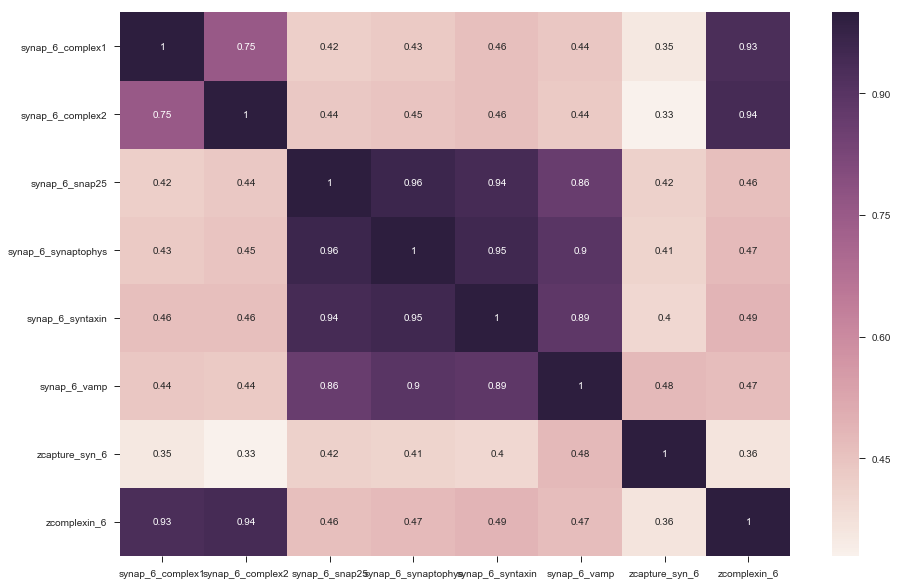

In [38]:

import seaborn as sns
sns.set(style="ticks", color_codes=True)
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
#lets plot some graphics from the first dataset
corr_matrix =brain_proteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix,annot=True)


In [ ]:
#VAMP protein =
#
#VAMPs have a role in exocrine secretion
#Synaptosomal-associated protein 25 (SNAP-25) 
#is a t-SNARE protein that is encoded by the SNAP25 gene in humans.[5] 
#SNAP-25 is a component of the trans-SNARE complex, which is proposed to account for the specificity of membrane fusion and to directly execute fusion by forming a tight complex that brings the synaptic 
#vesicle and plasma membranes together.[6]
#Synaptophysin regulates the kinetics of synaptic vesicle endocytosis in central neurons
#yntaxins possess a single C-terminal transmembrane domain, a SNARE domain (known as H3), and an N-terminal regulatory domain (Habc). Syntaxin 17 may have two transmembrane domains.

#The SNARE (H3) domain binds to both synaptobrevin and SNAP-25 forming the core SNARE complex. 

In [44]:
df.groupby('dcfdx').projid.count()

dcfdx
1.0    2270
2.0     705
3.0      23
4.0     421
5.0      39
6.0      16
Name: projid, dtype: int64

In [90]:
df_1=df[df['dcfdx']==1]
df_2=df[df['dcfdx']==2]
df_3=df[df['dcfdx']==3]
df_4=df[df['dcfdx']>=4]
df_5=df[df['dcfdx']==5]
df_6=df[df['dcfdx']==6]


len(df_4.projid.unique())

In [79]:
df_6.groupby('fu_year').glucose.max()

fu_year
0      NaN
1      NaN
2     1.21
3     2.00
5      NaN
6     0.80
9      NaN
11    0.73
13    1.43
18     NaN
Name: crn, dtype: float64

In [88]:
df_2.groupby('fu_year').chlstrl.max()

fu_year
0     312.0
1     292.0
2     291.0
3     290.0
4     269.0
5     295.0
6     273.0
7     277.0
8     269.0
9     284.0
10    257.0
11    255.0
12    212.0
13    275.0
14    276.0
15    216.0
16    251.0
17    211.0
18    192.0
19    183.0
20      NaN
21      NaN
Name: chlstrl, dtype: float64

# OUTLIER AND MISSING DATA ANALYSIS  ON BLOOD PRESSURE ELEMENTS

In [56]:
df.groupby('fu_year').crn.count()

,count,mean,std,min,25%,50%,75%,max
fu_year,,,,,,,,
0,62.0,1.020484,0.265110,0.60,0.8000,1.030,1.1975,1.90
1,43.0,1.077674,0.261787,0.60,0.8300,1.100,1.2500,1.77
2,31.0,1.050323,0.281478,0.60,0.8000,0.990,1.2900,1.60
3,28.0,0.938929,0.189078,0.58,0.8000,0.900,1.0925,1.30
4,25.0,0.966000,0.236308,0.60,0.8000,0.900,1.1000,1.50
5,30.0,0.908333,0.237038,0.57,0.7200,0.890,1.0000,1.50
6,30.0,0.992000,0.245868,0.70,0.8125,0.935,1.0825,1.68
7,23.0,0.967826,0.223951,0.59,0.8050,0.960,1.0250,1.59
8,19.0,0.910526,0.209801,0.56,0.7550,0.940,1.0100,1.39


In [85]:
df_6.groupby('fu_year').chlstrl.describe()

,count,mean,std,min,25%,50%,75%,max
fu_year,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,197.0,NaN,197.0,197.0,197.0,197.0,197.0
3,1.0,242.0,NaN,242.0,242.0,242.0,242.0,242.0
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,211.0,NaN,211.0,211.0,211.0,211.0,211.0
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1.0,197.0,NaN,197.0,197.0,197.0,197.0,197.0
13,1.0,150.0,NaN,150.0,150.0,150.0,150.0,150.0


/Users/dilruba_p/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


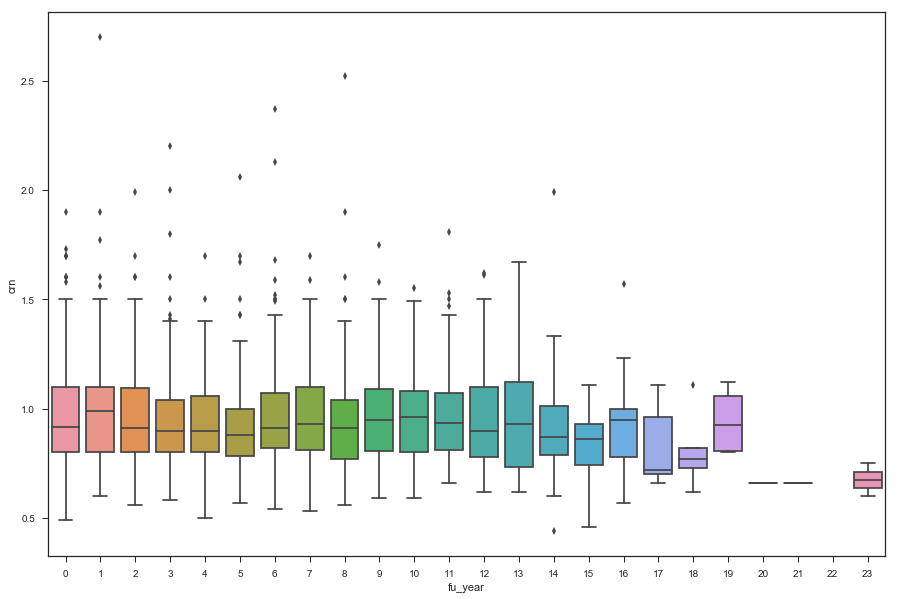

In [60]:
ax = sns.boxplot(x="fu_year", y="crn", data=df)

/Users/dilruba_p/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


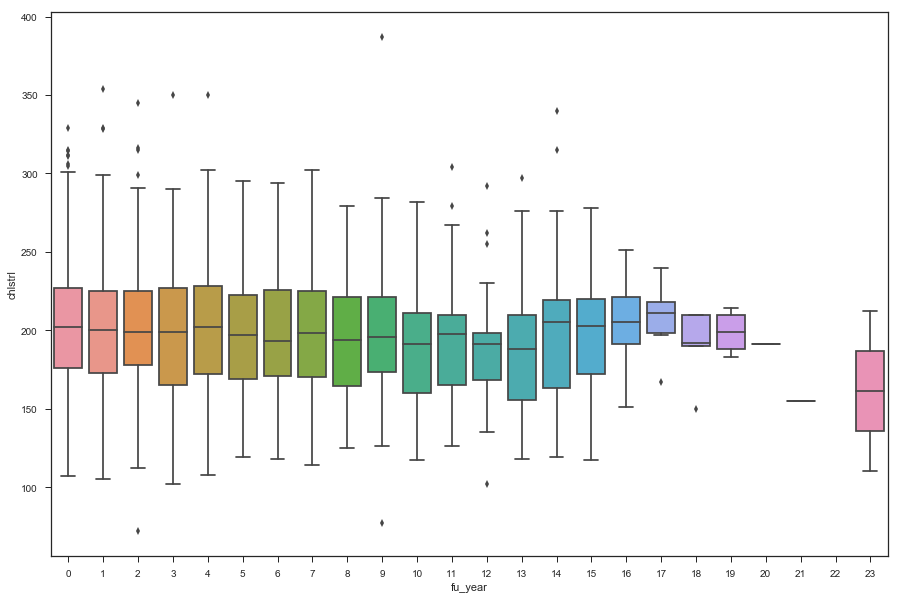

In [61]:
ax = sns.boxplot(x="fu_year", y="chlstrl", data=df)

In [ ]:
# we have to drop fu_year 20 ,21 ,22 no data for that part!

In [63]:
df.groupby('fu_year').chlstrl.describe()

,count,mean,std,min,25%,50%,75%,max
fu_year,,,,,,,,
0,225.0,204.804444,41.042193,107.0,176.00,202.0,227.00,329.0
1,217.0,200.995392,41.545212,105.0,173.00,200.0,225.00,354.0
2,184.0,200.777174,39.833524,72.0,177.75,199.0,225.25,345.0
3,145.0,197.027586,41.669991,102.0,165.00,199.0,227.00,350.0
4,116.0,200.775862,42.251851,108.0,172.00,202.0,228.00,350.0
5,115.0,197.217391,38.669944,119.0,169.00,197.0,222.50,295.0
6,123.0,197.585366,35.956241,118.0,171.00,193.0,225.50,294.0
7,102.0,199.372549,41.827539,114.0,170.00,198.0,224.75,302.0
8,88.0,195.522727,38.026904,125.0,164.75,193.5,221.00,279.0


In [ ]:
glucose

/Users/dilruba_p/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


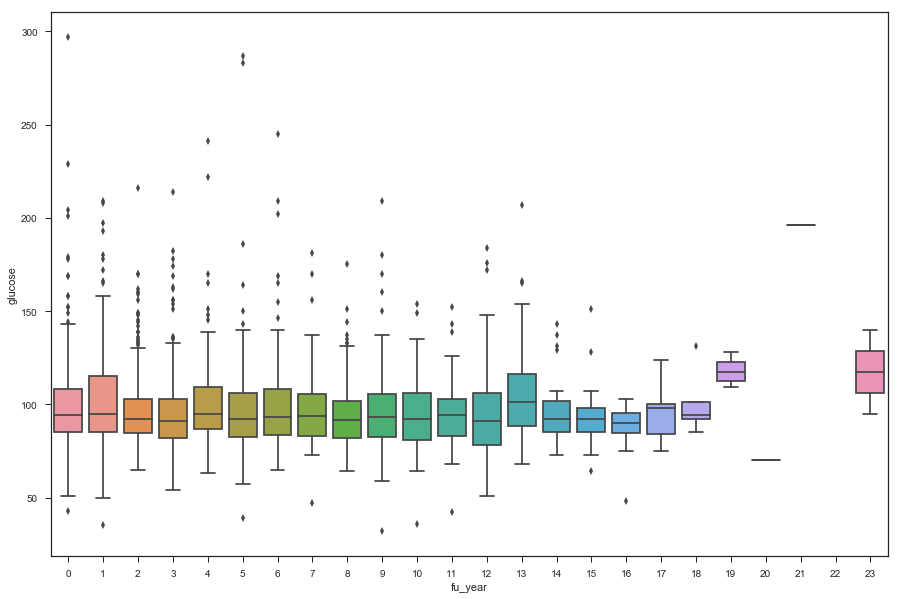

In [71]:
ax = sns.boxplot(x="fu_year", y="glucose", data=df)

In [1]:
ax = sns.boxplot(x="fu_year", y="mch", data=df)

NameError: name 'sns' is not defined

In [ ]:
print("hello")

In [ ]:
#In most larger samplings of data, some data points will be further away from the sample mean than what is deemed reasonable. This can be due to incidental systematic error or flaws in the theory that generated an assumed family of probability distributions

In [ ]:
#As a very practical method for handling data when we cannot make good decisions about 
#where a data point comes from may be found in the methods of robust statistics.  
#The idea is to summarize the main body of data in a way that ignores 
#overly influential observations.  There are several principles that guide this field.  
#Two of the simple ideas are trimming and Winsorizing.  
#Trimming involves ignoring some percentage of extreme observations by just removing them from the distribution of data points.  
#A 10% trimmed mean, for example would simply remove the top 5% and the bottom 5% of the data points and calculate a mean of what is left.   
#Similar strategies exist for dealing with multivariate data.  

#Winsorizing ls a little different, in that new data values will be imputed for extreme observations.  In the case of a mean, one simple Winsorizing strategy involves replacing the extreme data value with the next most extreme data value.  This is expected to remove some of the overly influential impact that a particular data point has on the results.  Other possibilities also exist using the concept of nearest neigh#

In [ ]:
# the missing data is MCAR ,meaning there is no relation between variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f5a7b8>]], dtype=object)

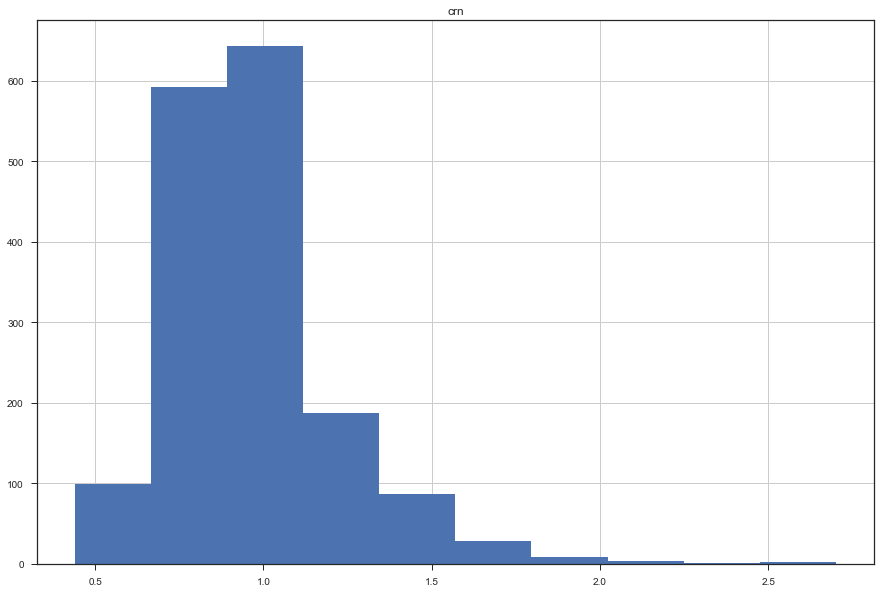

In [89]:
df.hist(column="crn")

In [ ]:


mean = numpy.mean(elements, axis=0)
sd = numpy.std(elements, axis=0)

final_list = [x for x in arr if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
print(final_list)

In [69]:
df['chlstrl'].mean()

198.8885523924894

2        205.0
3        230.0
4        210.0
5        201.0
6        231.0
37       230.0
39       263.0
40       276.0
41       232.0
43       246.0
49       150.0
53       237.0
61       196.0
72       229.0
73       241.0
98       167.0
100      177.0
102      188.0
111      192.0
112      142.0
117      143.0
118      154.0
141      267.0
142      268.0
147      225.0
150      223.0
174      156.0
175      212.0
176      244.0
177      222.0
         ...  
25401    153.0
25402    150.0
25403    150.0
25404    182.0
25405    198.0
25430    175.0
25447    156.0
25448    165.0
25449    155.0
25470    305.0
25487    226.0
25488    184.0
25489    177.0
25490    185.0
25491    213.0
25510    236.0
25520    172.0
25521    186.0
25523    164.0
25524    182.0
25525    197.0
25526    175.0
25527    164.0
25534    239.0
25536    259.0
25537    243.0
25538    255.0
25541    274.0
25552    181.0
25555    159.0
Name: chlstrl, Length: 1651, dtype: float64

In [ ]:

elements = numpy.array(arr)

mean = numpy.mean(elements, axis=0)
sd = numpy.std(elements, axis=0)

final_list = [x for x in arr if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
print(final_list)